In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
leads_df = pd.read_csv('Leads.csv')

# Data Cleaning and Preprocessing

# Dropping irrelevant columns
columns_to_drop = ['Prospect ID', 'Lead Number', 'Magazine', 'Newspaper Article', 
                   'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                   'Through Recommendations', 'Tags', 'Lead Quality', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 
                   'A free copy of Mastering The Interview']
leads_df_cleaned = leads_df.drop(columns=columns_to_drop)

# Handling 'Select' values, treating them as missing data
leads_df_cleaned = leads_df_cleaned.replace('Select', pd.NA)

# Filling missing values in relevant columns
leads_df_cleaned['Country'].fillna('India', inplace=True)
leads_df_cleaned['Specialization'].fillna('Not Specified', inplace=True)
leads_df_cleaned['What is your current occupation'].fillna('Not Specified', inplace=True)

# Droping rows with missing values in critical columns
leads_df_cleaned.dropna(subset=['Lead Source', 'Last Activity', 'TotalVisits', 'Page Views Per Visit'], inplace=True)

# Encoding categorical variables using one-hot encoding
leads_df_encoded = pd.get_dummies(leads_df_cleaned, drop_first=True)

# Scaling numerical columns
scaler = StandardScaler()
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
leads_df_encoded[numerical_cols] = scaler.fit_transform(leads_df_encoded[numerical_cols])

# Defining features and target
X = leads_df_encoded.drop(columns=['Converted'])
y = leads_df_encoded['Converted']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Preprocessing Completed.")

Data Preprocessing Completed.


In [3]:
# Importing the Logistic Regression model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training the model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the test data
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

print("Model Training and Prediction Completed.")

Model Training and Prediction Completed.


In [5]:
# Importing necessary metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Displaying the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Displaying classification report for more detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 82.48%
Precision: 81.06%
Recall: 71.82%
ROC-AUC Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1662
           1       0.81      0.72      0.76      1061

    accuracy                           0.82      2723
   macro avg       0.82      0.81      0.81      2723
weighted avg       0.82      0.82      0.82      2723


Confusion Matrix:
[[1484  178]
 [ 299  762]]


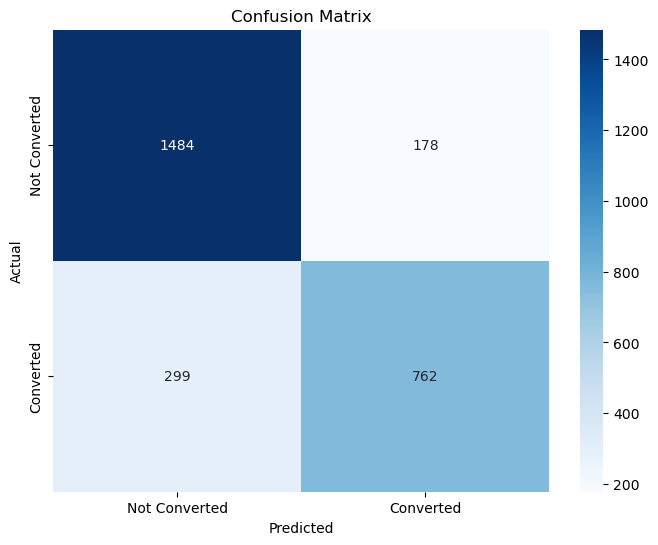

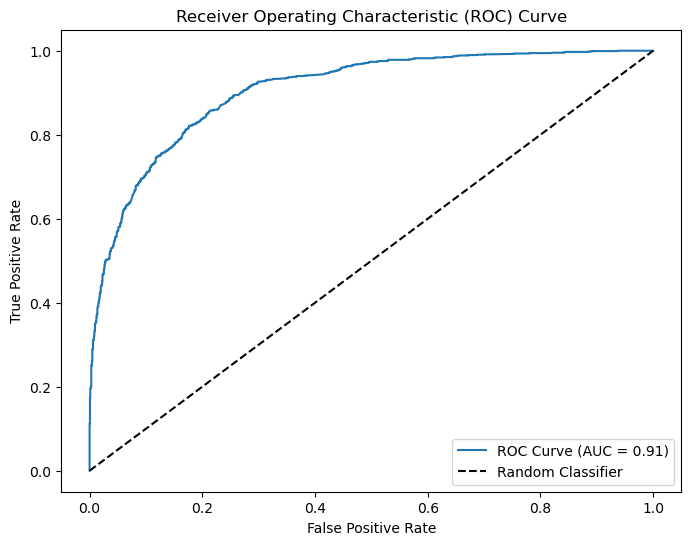

In [7]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()